In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

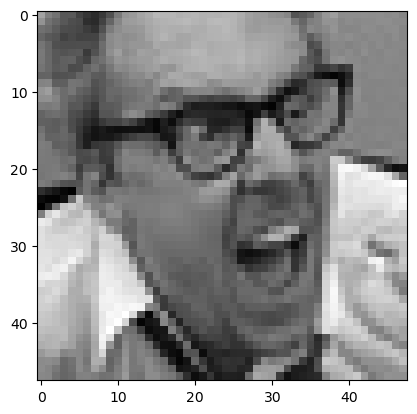

In [8]:
plt.imshow(img_array)

In [4]:
Datadirectory = "Training2/"

In [5]:
Classes = ["0", "1", "2", "3", "4", "5"] #classes = name of folders

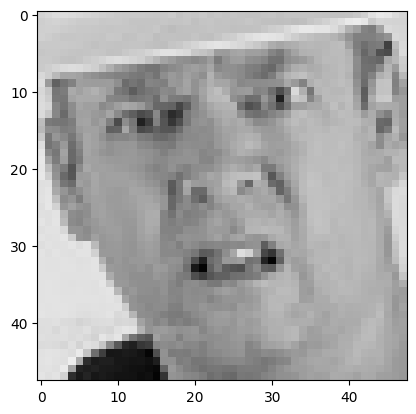

In [6]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

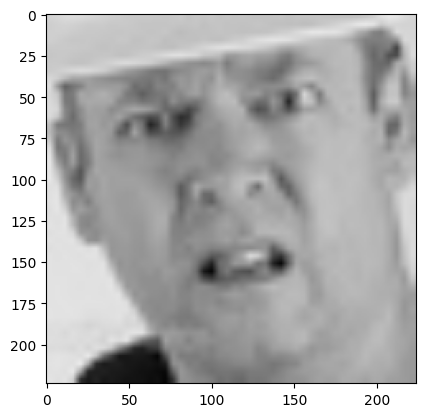

In [7]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(224, 224, 3)

# Read all images and convert into Array

In [33]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass
    

In [34]:
create_training_Data()

In [35]:
print(len(training_Data))

653


In [36]:
import random
random.shuffle(training_Data)

In [37]:
x = [] # data/ feature
y = [] # label

for features,label in training_Data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1, img_size, img_size, 3)


In [38]:
x.shape

(653, 224, 224, 3)

In [39]:
batch_size = 5000  # Adjust based on available memory
for i in range(0, len(x), batch_size):
    x[i:i+batch_size] = x[i:i+batch_size].astype('float32') / 255.0

In [40]:
x.shape

(653, 224, 224, 3)

In [119]:
y[2500]

IndexError: list index out of range

In [41]:
Y = np.array(y)

In [42]:
Y.shape

(653,)

# Deep Learning Model for Training

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.MobileNetV2() # pre trained model

In [97]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

# Transfer Learning

In [173]:
base_input = model.input

In [175]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_156>

In [177]:
base_output = model.layers[-2].output

In [179]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_310>

In [181]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [183]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_342>

In [185]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [187]:
new_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [195]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [509]:
new_model.fit(x, Y, epochs = 15)

IndexError: tuple index out of range

In [523]:
new_model.save('my_model_64p35.h5')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=my_model_64p35..

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input

model = Sequential([
    Input(shape=(64, 64, 3)),  # Define input explicitly
    Conv2D(32, (3, 3), activation='relu'),
    # Other layers...
])


In [43]:
new_model = tf.keras.models.load_model('my_model_64p35_New7.h5')

In [44]:
new_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [45]:
new_model.fit(x, Y, epochs = 50)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.3675 - loss: 1.5322   
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3796 - loss: 1.4862
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3730 - loss: 1.4865
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3820 - loss: 1.4854
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3733 - loss: 1.5005
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3850 - loss: 1.4544
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3918 - loss: 1.4763
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3615 - loss: 1.4632
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3901 - loss: 1.4559
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3560 - loss: 1.4938
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3849 - loss: 1.4400
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4030 -

In [46]:
new_model.save('my_model_64p35_New8.h5')

In [203]:
new_model2 = tf.keras.models.load_model('my_model_64p35_New6.h5')

In [204]:
frame = cv2.imread("happyboy.jpg")

In [205]:
frame.shape

(1023, 1023, 3)

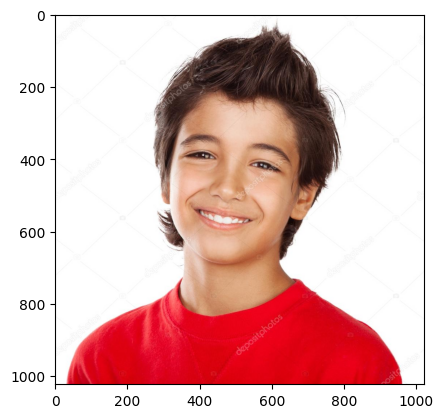

In [206]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [207]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [208]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [209]:
gray.shape

(1023, 1023)

In [210]:
faces = faceCascade.detectMultiScale (gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y: y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
    facess = faceCascade.detectMultiScale (roi_gray)
    if len(facess) == 0:
        print("Face not detected")
        
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

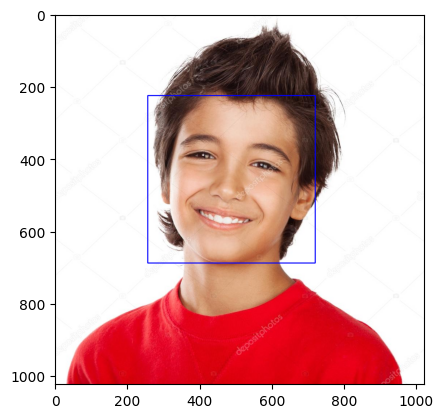

In [211]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

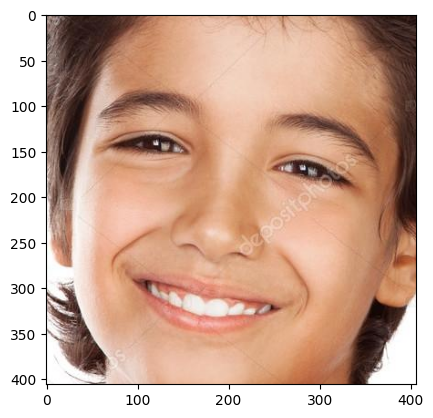

In [212]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [213]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image = final_image/255.0


In [214]:
predictions = new_model2.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [215]:
predictions[0]

array([1.1516776e-06, 1.2787369e-16, 7.4647868e-01, 2.4954927e-01,
       3.9517032e-03, 1.9247656e-05, 1.2371088e-30], dtype=float32)

In [216]:
np.argmax(predictions)

2

In [218]:
import cv2
import numpy as np
import tensorflow as tf

# Load pre-trained model
new_model = tf.keras.models.load_model('my_model_64p35_New6.h5')  # Load your trained model

# Load Haar Cascade for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        continue  # Skip frame if not read properly

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    status = "No Face Detected"
    face_roi = None

    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Crop face region
        face_roi = cv2.resize(roi_color, (224, 224))
        face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension
        face_roi = face_roi / 255.0  # Normalize pixel values

        # Predict emotion
        Predictions = new_model.predict(face_roi)
        emotion_index = np.argmax(Predictions)

        emotions = ["Angry", "Sad", "Depressed", "Happy", "Sad", "Happy"]
        status = emotions[emotion_index]

    # Display status
    x1, y1, w1, h1 = 10, 10, 200, 50
    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
    cv2.putText(frame, status, (x1 + 10, y1 + 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━